In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('property_with_population.csv')
df = df.drop(columns = ['SA12018_code'])

In [3]:
df.head()

,Bedrooms,Bathrooms,Address,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs,Population,NZDep2018,NZDep2018_Score
0,5,3.0,"106 Lawrence Crescent Hill Park, Auckland",714,960000,-37.012920,174.904069,7009770,48,27,24,21,24,21,Manurewa,177,6.0,997.0
1,5,3.0,"8 Corsica Way Karaka, Auckland",564,1250000,-37.063672,174.922912,7009991,42,18,12,21,15,30,Karaka,123,1.0,881.0
2,6,4.0,"243 Harbourside Drive Karaka, Auckland",626,1250000,-37.063580,174.924044,7009991,42,18,12,21,15,30,Karaka,123,1.0,881.0
3,2,1.0,"2/30 Hardington Street Onehunga, Auckland",65,740000,-36.912996,174.787425,7007871,42,6,21,21,12,15,Onehunga,120,2.0,908.0
4,3,1.0,"59 Israel Avenue Clover Park, Auckland",601,630000,-36.979037,174.892612,7008902,93,27,33,30,21,33,Clover Park,228,9.0,1091.0


In [4]:
df.shape

(1051, 18)

In [5]:
df.isnull().values.any()

True

In [6]:
df.isna().sum()

Bedrooms           0
Bathrooms          2
Address            0
Land area          0
CV                 0
Latitude           0
Longitude          0
SA1                0
0-19 years         0
20-29 years        0
30-39 years        0
40-49 years        0
50-59 years        0
60+ years          0
Suburbs            1
Population         0
NZDep2018          0
NZDep2018_Score    0
dtype: int64

In [7]:
df1 = df.loc[df.isna().any(axis=1)]
df1

,Bedrooms,Bathrooms,Address,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs,Population,NZDep2018,NZDep2018_Score
309,4,NaN,"14 Hea Road Hobsonville, Auckland",214,1250000,-36.798371,174.647430,7002267,60,66,60,24,24,18,Hobsonville,246,2.0,911.0
311,4,NaN,"16 Hea Road Hobsonville, Auckland",245,1100000,-36.798371,174.647430,7002267,60,66,60,24,24,18,Hobsonville,246,2.0,911.0
568,1,1.0,"14 Te Rangitawhiri Road Great Barrier Island, ...",2141,740000,-36.197282,175.416921,7001131,27,6,6,18,39,60,NaN,156,9.0,1122.0


The empty suburb is due to property being on Great Barrier Island
Thus we can check if there are any other Great Barrier Properties

In [8]:
islands =[]
for i in df.Suburbs.unique():
    try:
        if "Island" in i:
            islands.append(i)
    except (TypeError):
        print('Value was NaN')
islands

Value was NaN


['Great Barrier Island (Aotea Island)', 'Waiheke Island', 'Rakino Island']

We can see that datapoint 568 may have suburb 'Great Barrier Island (Aotea Island)'

In [9]:
df.set_value(568, 'Suburbs', 'Great Barrier Island (Aotea Island)')
df1 = df.loc[df.isna().any(axis=1)]
df1

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':


,Bedrooms,Bathrooms,Address,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs,Population,NZDep2018,NZDep2018_Score
309,4,NaN,"14 Hea Road Hobsonville, Auckland",214,1250000,-36.798371,174.64743,7002267,60,66,60,24,24,18,Hobsonville,246,2.0,911.0
311,4,NaN,"16 Hea Road Hobsonville, Auckland",245,1100000,-36.798371,174.64743,7002267,60,66,60,24,24,18,Hobsonville,246,2.0,911.0


Since other two NaN are bathrooms we can set them as mean number among the houses with 4 rooms

In [10]:
dfOf4Bedrooms = df.loc[df.Bedrooms == 4]
meanBathrooms = int(dfOf4Bedrooms.Bathrooms.mean())
meanBathrooms

2

In [11]:
#changing the num of bathrooms of other NaNs to 2
df.set_value(309, 'Bathrooms', 2)
df.set_value(311, 'Bathrooms', 2)
df.loc[df.isna().any(axis=1)].shape

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  app.launch_new_instance()


(0, 18)

In [12]:
df.dtypes

Bedrooms             int64
Bathrooms          float64
Address             object
Land area           object
CV                   int64
Latitude           float64
Longitude          float64
SA1                  int64
0-19 years           int64
20-29 years          int64
30-39 years          int64
40-49 years          int64
50-59 years          int64
60+ years            int64
Suburbs             object
Population           int64
NZDep2018          float64
NZDep2018_Score    float64
dtype: object

In [13]:
# Land area should be an integer thus we check it
df['Land area'].unique()

array(['714', '564', '626', '65', '601', '100', '531', '1024', '80',
       '204', '170', '637', '640', '650', '138', '75', '724', '429',
       '520', '1381', '732', '799', '1105', '463', '681', '4068', '106',
       '713', '211', '402', '883', '883 m²', '675', '388', '1034', '1295',
       '1102', '551', '809', '1108', '745', '613', '758', '727', '59',
       '260 m²', '126', '615', '756', '3609', '431', '3648', '3177',
       '545', '420 m²', '481', '279', '120', '1037', '202', '1031', '602',
       '810', '475', '736', '110', '99', '153', '245', '2567 m²', '1500',
       '885', '480', '377', '688', '10557', '405', '561', '255', '519',
       '522', '651', '559', '420', '472', '1067', '726', '251', '220',
       '1467', '701', '826', '743', '272', '672', '772', '318', '895',
       '2028', '371', '93', '286', '623', '479', '113', '469', '898',
       '370', '422', '868', '880', '690', '238', '569', '8000', '8129',
       '447', '744', '630', '415', '804', '323', '728', '580', '140',

In [14]:
# some rows in land area contain m^2, thus we remove it
def remove_m2(landArea):
    msquared = 'm²'
    if msquared in landArea:
        landArea = landArea[:3]
    return landArea
df['Land area'] = df['Land area'].apply(remove_m2)
df['Land area'] = df['Land area'].astype(float)
df.dtypes

Bedrooms             int64
Bathrooms          float64
Address             object
Land area          float64
CV                   int64
Latitude           float64
Longitude          float64
SA1                  int64
0-19 years           int64
20-29 years          int64
30-39 years          int64
40-49 years          int64
50-59 years          int64
60+ years            int64
Suburbs             object
Population           int64
NZDep2018          float64
NZDep2018_Score    float64
dtype: object

In [15]:
# create distance to cbd var and check the correlation via time to cbd

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd969bdb7b8>,
      dtype=object)

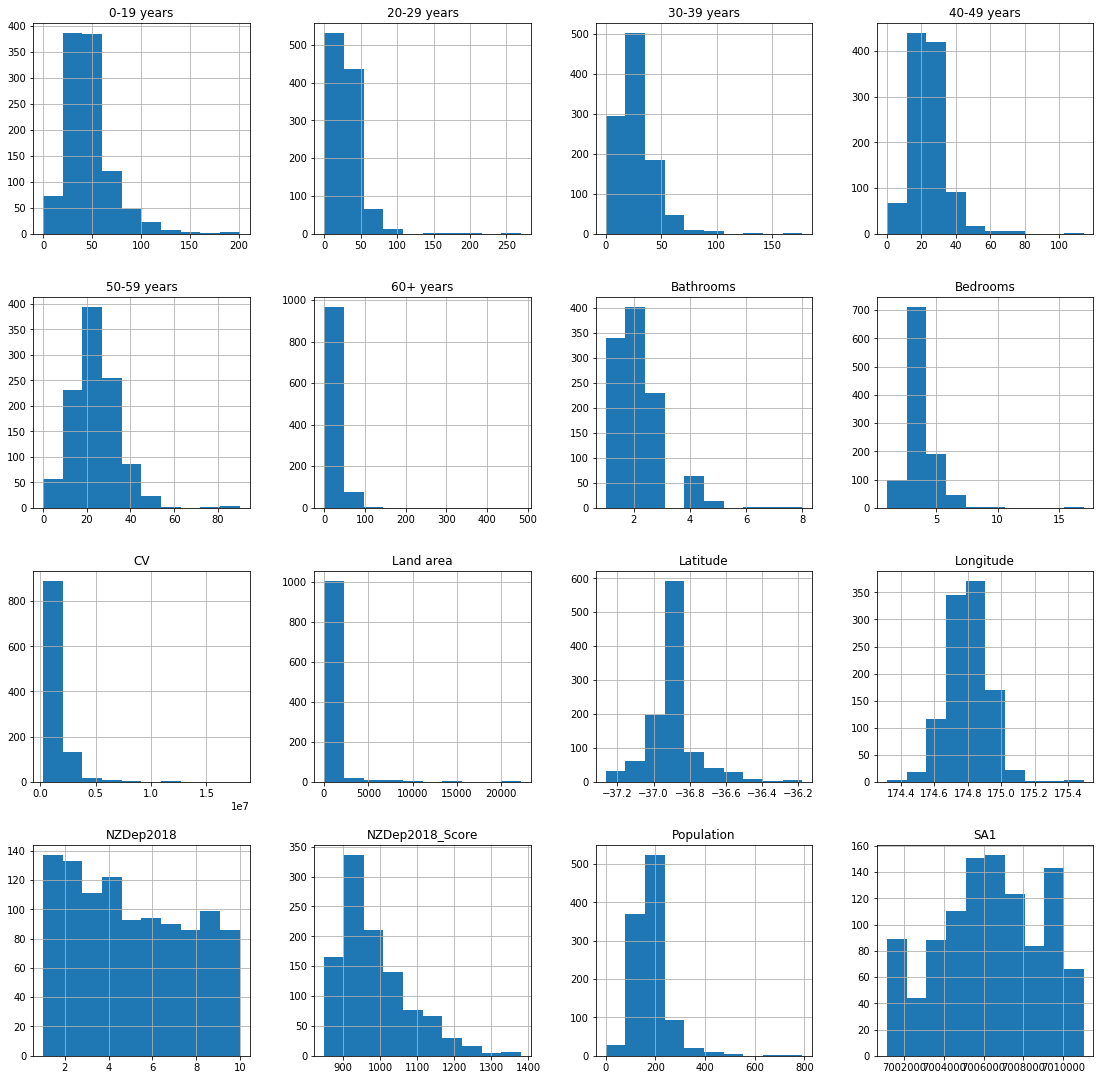

In [16]:
df.hist(figsize=(19,19))

In [17]:
df.describe()

,Bedrooms,Bathrooms,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Population,NZDep2018,NZDep2018_Score
count,1051.000000,1051.000000,1051.000000,1.051000e+03,1051.000000,1051.000000,1.051000e+03,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000
mean,3.777355,2.073264,814.847764,1.387521e+06,-36.893715,174.799325,7.006319e+06,47.549001,28.963844,27.042816,24.125595,22.615604,29.360609,181.230257,5.063749,986.503330
std,1.169412,0.992044,1582.902438,1.182939e+06,0.130100,0.119538,2.591262e+03,24.692205,21.037441,17.975408,10.942770,10.210578,21.805031,72.087700,2.913471,94.287255
min,1.000000,1.000000,40.000000,2.700000e+05,-37.265021,174.317078,7.001130e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,849.000000
25%,3.000000,1.000000,289.500000,7.800000e+05,-36.950565,174.720779,7.004416e+06,33.000000,15.000000,15.000000,18.000000,15.000000,18.000000,138.000000,2.000000,918.000000
50%,4.000000,2.000000,541.000000,1.080000e+06,-36.893132,174.798575,7.006325e+06,45.000000,24.000000,24.000000,24.000000,21.000000,27.000000,171.000000,5.000000,959.000000
75%,4.000000,3.000000,809.000000,1.600000e+06,-36.855789,174.880944,7.008384e+06,57.000000,36.000000,33.000000,30.000000,27.000000,36.000000,210.000000,8.000000,1031.000000
max,17.000000,8.000000,22240.000000,1.800000e+07,-36.177655,175.492424,7.011028e+06,201.000000,270.000000,177.000000,114.000000,90.000000,483.000000,792.000000,10.000000,1380.000000


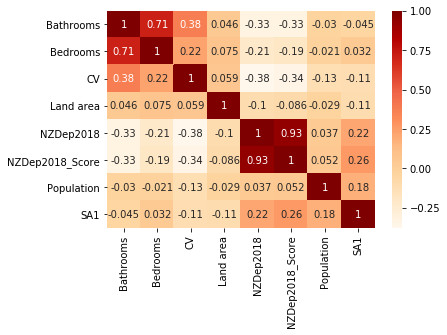

In [18]:
correlation_matrix = df[df.columns.difference(['Latitude', 'Longitude', '0-19 years', '20-29 years', '30-39 years', '40-49 years', '50-59 years', '60+ years',])].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="OrRd")
plt.show()

### Adding a new column that will calculate travel time to CBD

In [33]:
# using google maps API
url = 'https://maps.googleapis.com/maps/api/distancematrix/json?'
import requests
import json


In [36]:
gmapsAPI_key = 'KeyWasHere'
source = '5 Schopolo Place, Auckland'
dest = 'Britomart station, Auckland'
response = requests.get(url + 'origins = ' + source + '&destinations = ' + dest + '&key = ' + gmapsAPI_key)
x = response.json()
print(x)

{'destination_addresses': [], 'error_message': 'You must use an API key to authenticate each request to Google Maps Platform APIs. For additional information, please refer to http://g.co/dev/maps-no-account', 'origin_addresses': [], 'rows': [], 'status': 'REQUEST_DENIED'}


In [38]:
import sys
!{sys.executable} -m pip install googlemaps

  Created wheel for googlemaps: filename=googlemaps-4.4.1-py3-none-any.whl size=37893 sha256=25c39a7761c1da4406edb9b7a9bac311dcd5d9bf14d19fdd016ba31ff55f541d
  Stored in directory: /home/nbuser/.cache/pip/wheels/60/c1/24/f4106fab4c35f2a6c05e78e28e8d2d4baec95e24f117fb8c1f
Successfully built googlemaps


In [68]:
import googlemaps 
import math
# Requires API key 
gmaps = googlemaps.Client(key='KeyWasHere') 
  
# Printing the result 
print(my_dist) 

{'distance': {'text': '21.0 km', 'value': 21003}, 'duration': {'text': '21 mins', 'value': 1257}, 'status': 'OK'}


In [70]:
def distanceToCBD(address):
    destination = "33-43 Princes Street, Auckland CBD, Auckland 1010" #taking Albert park as Auckland CBD
    dist = gmaps.distance_matrix(address,destination)['rows'][0]['elements'][0] 
    try:
        timeToCBD = dist['duration']['value']
        distanceToCBD = dist['distance']['value']
    except (KeyError):
        timeToCBD = math.inf
        distanceToCBD = math.inf
    return pd.Series({'Time to CBD' : timeToCBD, 'Distance to CBD' : distanceToCBD})


In [71]:
df[['Time to CBD', 'Distance To CBD']] =  df.Address.apply(distanceToCBD)

In [76]:
df1 = df.loc[df['Time to CBD'] == math.inf]
df1


,Bedrooms,Bathrooms,Address,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs,Population,NZDep2018,NZDep2018_Score,Time to CBD,Distance To CBD
496,3,1.0,"236 Kaiaraara Bay Road Great Barrier Island, A...",5638.0,580000,-36.177655,175.359070,7001130,39,9,18,24,24,42,Great Barrier Island (Aotea Island),207,9.0,1093.0,inf,inf
568,1,1.0,"14 Te Rangitawhiri Road Great Barrier Island, ...",2141.0,740000,-36.197282,175.416921,7001131,27,6,6,18,39,60,Great Barrier Island (Aotea Island),156,9.0,1122.0,inf,inf
569,5,3.0,"349 Blind Bay Road Great Barrier Island, Auckland",3953.0,920000,-36.257895,175.436448,7001131,27,6,6,18,39,60,Great Barrier Island (Aotea Island),156,9.0,1122.0,inf,inf
627,3,2.0,"25 Ocean View Crescent Rakino Island, Auckland",1366.0,270000,-36.719592,174.949563,7001354,0,0,0,0,0,6,Rakino Island,24,6.0,991.0,inf,inf
628,2,1.0,"2/66 South Pacific Road Rakino Island, Auckland",40.0,3250000,-36.719672,174.951524,7001354,0,0,0,0,0,6,Rakino Island,24,6.0,991.0,inf,inf
731,2,2.0,"8 Omanawa Lane Great Barrier Island, Auckland",8638.0,650000,-36.305955,175.492424,7001135,30,21,21,21,39,69,Great Barrier Island (Aotea Island),198,9.0,1107.0,inf,inf


We can see that 3 entries are from great barrier island and 2 are from Rakino island. 
From a google search we estimate that travel time to Great barrier is approximately 2h46 (93km) and to (21.7 km) Rakino is 1h02  by ferry

In [103]:
timetoGBI = (2*60+46)*60 #to sec
distanceToGBI = 93000 #to meters
timetoRI = 62*60 # to sec
distanceToRI = 21700
def change_distance(row):
    suburb = row['Suburbs']
    distance = row['Distance To CBD']
    time = row['Time to CBD']
    if suburb == 'Great Barrier Island (Aotea Island)':
        distance = distanceToGBI 
        time = timetoGBI
    elif suburb == 'Rakino Island':
        distance = distanceToRI
        time = timetoRI
    return pd.Series({'Time to CBD': time, 'Distance To CBD': distance})


In [77]:
df.to_csv('property_with_travelTimes.csv', index = False)

In [97]:
df1 = df.copy(deep=False)
df1.shape
df1.head()

,Bedrooms,Bathrooms,Address,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs,Population,NZDep2018,NZDep2018_Score,Time to CBD,Distance To CBD
0,5,3.0,"106 Lawrence Crescent Hill Park, Auckland",714.0,960000,-37.012920,174.904069,7009770,48,27,24,21,24,21,Manurewa,177,6.0,997.0,1056.0,23423.0
1,5,3.0,"8 Corsica Way Karaka, Auckland",564.0,1250000,-37.063672,174.922912,7009991,42,18,12,21,15,30,Karaka,123,1.0,881.0,1473.0,31962.0
2,6,4.0,"243 Harbourside Drive Karaka, Auckland",626.0,1250000,-37.063580,174.924044,7009991,42,18,12,21,15,30,Karaka,123,1.0,881.0,1443.0,31786.0
3,2,1.0,"2/30 Hardington Street Onehunga, Auckland",65.0,740000,-36.912996,174.787425,7007871,42,6,21,21,12,15,Onehunga,120,2.0,908.0,800.0,9120.0
4,3,1.0,"59 Israel Avenue Clover Park, Auckland",601.0,630000,-36.979037,174.892612,7008902,93,27,33,30,21,33,Clover Park,228,9.0,1091.0,1084.0,21300.0


In [104]:
df1[['Time to CBD', 'Distance To CBD']] = df1.apply(lambda row: change_distance(row), axis=1)



In [106]:
df1.describe()

,Bedrooms,Bathrooms,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Population,NZDep2018,NZDep2018_Score,Time to CBD,Distance To CBD
count,1051.000000,1051.000000,1051.000000,1.051000e+03,1051.000000,1051.000000,1.051000e+03,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000
mean,3.777355,2.073264,814.847764,1.387521e+06,-36.893715,174.799325,7.006319e+06,47.549001,28.963844,27.042816,24.125595,22.615604,29.360609,181.230257,5.063749,986.503330,1330.827783,20048.466223
std,1.169412,0.992044,1582.902438,1.182939e+06,0.130100,0.119538,2.591262e+03,24.692205,21.037441,17.975408,10.942770,10.210578,21.805031,72.087700,2.913471,94.287255,1052.745955,14005.745830
min,1.000000,1.000000,40.000000,2.700000e+05,-37.265021,174.317078,7.001130e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,849.000000,219.000000,658.000000
25%,3.000000,1.000000,289.500000,7.800000e+05,-36.950565,174.720779,7.004416e+06,33.000000,15.000000,15.000000,18.000000,15.000000,18.000000,138.000000,2.000000,918.000000,803.000000,10071.000000
50%,4.000000,2.000000,541.000000,1.080000e+06,-36.893132,174.798575,7.006325e+06,45.000000,24.000000,24.000000,24.000000,21.000000,27.000000,171.000000,5.000000,959.000000,1106.000000,16984.000000
75%,4.000000,3.000000,809.000000,1.600000e+06,-36.855789,174.880944,7.008384e+06,57.000000,36.000000,33.000000,30.000000,27.000000,36.000000,210.000000,8.000000,1031.000000,1470.000000,25831.500000
max,17.000000,8.000000,22240.000000,1.800000e+07,-36.177655,175.492424,7.011028e+06,201.000000,270.000000,177.000000,114.000000,90.000000,483.000000,792.000000,10.000000,1380.000000,9960.000000,93000.000000


In [107]:
df1.to_csv('property_with_travelTimes.csv', index = False)